# Diabetes Predictor Model - Exploratory Data Analysis

#### In the last 'Data Wrangling' notebook, we took a look at the Diabetes dataset for completeness and cleaned up the column of the target variable (DiabetesDiagnosis). 

#### In this notebook we will:
#### 1. Explore each individual variable in the dataset
#### 2. Assess the relationship between each variable and the target
#### 3. Assess interactions between variables

In [1]:
# Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

#show plots inline
%matplotlib inline

In [2]:
# Supress future warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
# Loading the dataset

df = pd.read_csv('cleaned_diabetes_df.csv')

In [4]:
# Looking at the shape and first few rows of dataset

print(df.shape)
print(df.head())

(253680, 22)
  DiabetesDiagnosis  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0          diabetes     1.0       1.0        1.0  25.0     0.0     0.0   
1          diabetes     0.0       0.0        1.0  29.0     0.0     0.0   
2          diabetes     1.0       1.0        1.0  35.0     1.0     0.0   
3          diabetes     1.0       0.0        1.0  31.0     0.0     0.0   
4          diabetes     1.0       1.0        1.0  26.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   1.0           1.0     1.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     0.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      2.0       0.0       0.0     

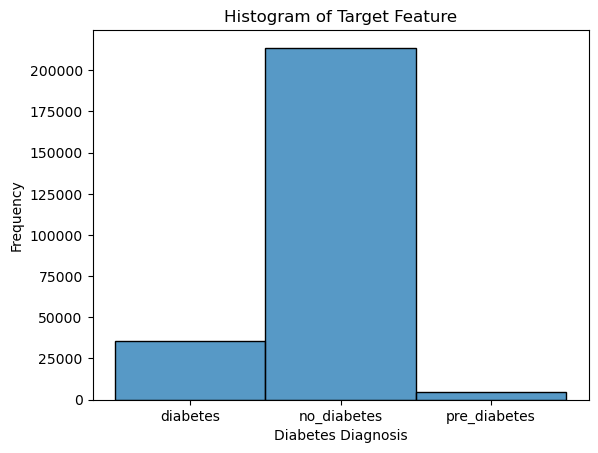

In [5]:
# Creating a univariate chart of my target (DiabetesDiagnosis)
# Creating a Histogram in this instance

sns.histplot(df['DiabetesDiagnosis'], bins=30, kde=False, discrete=True)
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Frequency')
plt.title('Histogram of Target Feature')
plt.show()

### Creating Bivariate Charts to Compare Each Feature to the Target Feature

In [7]:
# Grouping 'diabetes' with 'pre_diabetes' for the purpose of the below bivariate charts

# Defining category grouping
group_mapping = {'diabetes' : 'diabetes', 'pre_diabetes' : 'diabetes', 'no_diabetes' : 'no_diabetes'}

# Applying the mapping to the 'DiabetesDiagnosis' column
df['DiabetesDiagnosisGrouped'] = df['DiabetesDiagnosis'].map(group_mapping)

## Should I make a more simpler logic to replace the above using an if else or something (would I have to create a function?)
#diabetes = df[df['DiabetesDiagnosis'] == 'diabetes' or df['DiabetesDiagnosis'] == 'pre_diabetes']

# Or instead of doing above, we can change the pre_diabetes to diabetes in the column
 
# df[df['DiabetesDiagnosis'] == 'pre_diabetes']['DiabetesDiagnosis'] == 'diabetes'



In [8]:
print(df[['MentHlth', 'PhysHlth']].head(20))
print(df[['MentHlth', 'PhysHlth']].value_counts()) 
print(df[['MentHlth', 'PhysHlth']].dtypes)

    MentHlth  PhysHlth
0        0.0       0.0
1        0.0       0.0
2        1.0      30.0
3        0.0       0.0
4        0.0      10.0
5       30.0      15.0
6        0.0      30.0
7        0.0       0.0
8        0.0       0.0
9        0.0       0.0
10       2.0       4.0
11       0.0       0.0
12      30.0      17.0
13       0.0       0.0
14       0.0       0.0
15       7.0       0.0
16       0.0       0.0
17       5.0      10.0
18       1.0       0.0
19       0.0       3.0
MentHlth  PhysHlth
0.0       0.0         125985
          30.0          9129
          2.0           8802
2.0       0.0           7292
0.0       1.0           6739
                       ...  
15.0      16.0             1
2.0       17.0             1
26.0      1.0              1
14.0      28.0             1
13.0      29.0             1
Name: count, Length: 713, dtype: int64
MentHlth    float64
PhysHlth    float64
dtype: object


In [9]:
# Making the above features into integers instead of floats

df['MentHlth'] = df['MentHlth'].astype(int)
df['PhysHlth'] = df['PhysHlth'].astype(int)

print(df[['MentHlth', 'PhysHlth']].head())
print(df[['MentHlth', 'PhysHlth']].dtypes)

   MentHlth  PhysHlth
0         0         0
1         0         0
2         1        30
3         0         0
4         0        10
MentHlth    int64
PhysHlth    int64
dtype: object


In [14]:
# Checking for NaN values

print(df['MentHlth'].isna().sum())
print(df['PhysHlth'].isna().sum())


0
0


In [20]:
# Making my two continuous features (MentHlth & PhysHlth) into categorical features by using buckets

df['MentHlth'] = df['MentHlth'].clip(0, 30)
df['PhysHlth'] = df['PhysHlth'].clip(0, 30)

# Starting first with 'MentHlth'
df['MentHlth'] = pd.cut(df['MentHlth'], bins=[0, 7, 14, 21, 28, 30], labels=[1, 2, 3, 4, 5], right=True, include_lowest=True)

# Moving onto 'PhysHlth'
df['PhysHlth'] = pd.cut(df['PhysHlth'], bins=[0, 7, 14, 21, 28, 30], labels=[1, 2, 3, 4, 5], right=True, include_lowest=True)


In [22]:
print(df[['MentHlth', 'PhysHlth']].head())
print(df[['MentHlth', 'PhysHlth']].value_counts()) 

  MentHlth PhysHlth
0        1        1
1        1        1
2        1        5
3        1        1
4        1        2
MentHlth  PhysHlth
1         1           195539
          5            11721
          2             7429
2         1             5795
1         3             5733
5         1             5382
3         1             5142
5         5             4713
3         5             1781
          3             1403
1         4             1138
2         5             1067
5         3             1065
2         2              886
4         1              873
2         3              812
5         2              734
3         2              708
5         4              352
4         5              333
3         4              317
4         4              227
          3              221
2         4              190
4         2              119
Name: count, dtype: int64


In [24]:
# Checking for NaN values

print(df['MentHlth'].isna().sum())
print(df['PhysHlth'].isna().sum())

0
0


In [26]:
# Checking my data types

print(df.dtypes)

DiabetesDiagnosis             object
HighBP                       float64
HighChol                     float64
CholCheck                    float64
BMI                          float64
Smoker                       float64
Stroke                       float64
HeartDiseaseorAttack         float64
PhysActivity                 float64
Fruits                       float64
Veggies                      float64
HvyAlcoholConsump            float64
AnyHealthcare                float64
NoDocbcCost                  float64
GenHlth                      float64
MentHlth                    category
PhysHlth                    category
DiffWalk                     float64
Sex                          float64
Age                          float64
Education                    float64
Income                       float64
DiabetesDiagnosisGrouped      object
dtype: object


In [28]:
# Converting my categorical features into the integer dtype

categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
df[categorical_columns] = df[categorical_columns].astype('int')

# Converting BMI instead INT dtype
df['BMI'] = df['BMI'].astype(int)

print(df.dtypes)

DiabetesDiagnosis           object
HighBP                       int64
HighChol                     int64
CholCheck                    int64
BMI                          int64
Smoker                       int64
Stroke                       int64
HeartDiseaseorAttack         int64
PhysActivity                 int64
Fruits                       int64
Veggies                      int64
HvyAlcoholConsump            int64
AnyHealthcare                int64
NoDocbcCost                  int64
GenHlth                      int64
MentHlth                     int64
PhysHlth                     int64
DiffWalk                     int64
Sex                          int64
Age                          int64
Education                    int64
Income                       int64
DiabetesDiagnosisGrouped    object
dtype: object


In [34]:
# Converting my 'object' data types into strings

df['DiabetesDiagnosis'] = df['DiabetesDiagnosis'].astype(str)
df['DiabetesDiagnosisGrouped'] = df['DiabetesDiagnosisGrouped'].astype(str)

In [38]:
# Confirming that my 'object' data types are strings

print(type(df['DiabetesDiagnosisGrouped'].iloc[0]))

<class 'str'>


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

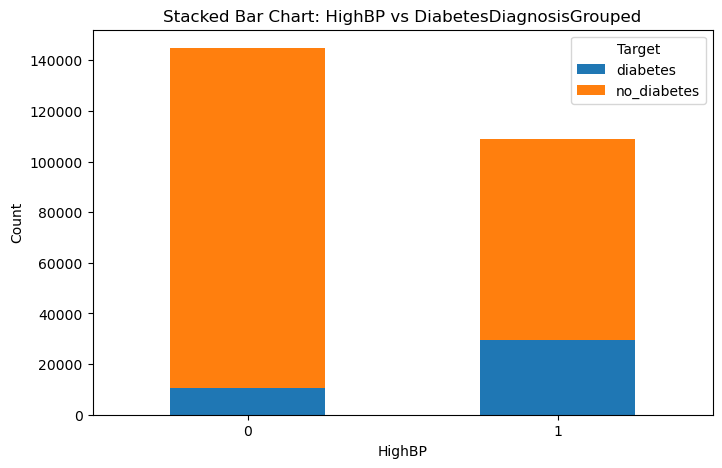

In [30]:
# Have you ever been told by a health professional that you have had high blood pressure?
# 0 = no high blood pressure
# 1 = high blood pressure

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['HighBP'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: HighBP vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

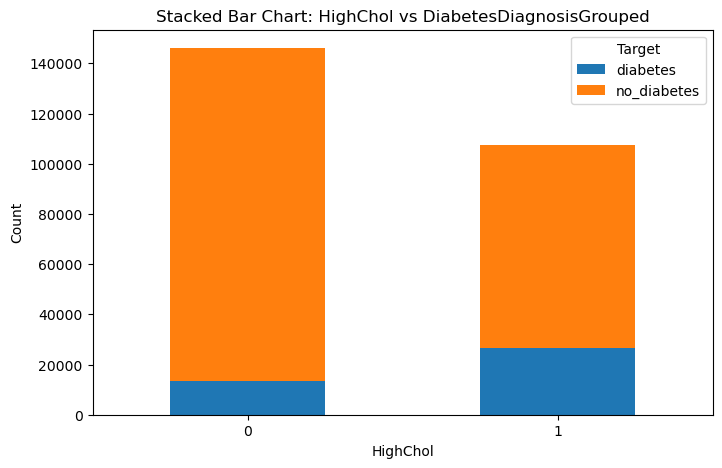

In [32]:
# Have you ever been told by a health professional that your blood cholesterol is high?
# 0 = no high cholesterol
# 1 = high cholesterol

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['HighChol'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('HighChol')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: HighChol vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

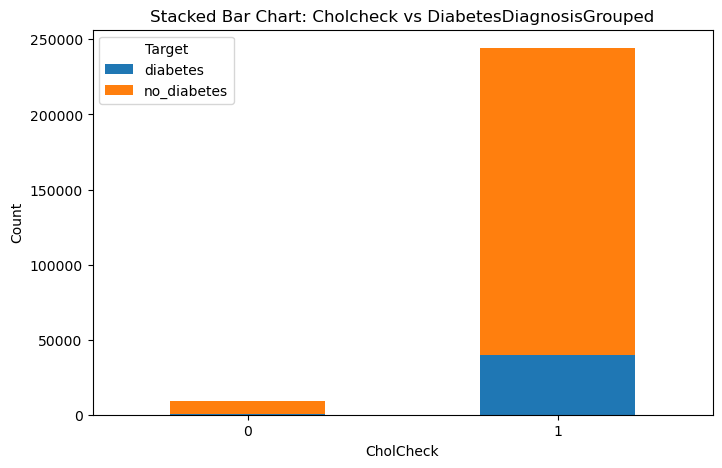

In [34]:
# Have you had your cholesterol checked within the past 5 years?
# 0 = no, cholesterol check in 5 years
# 1 = yes, cholesterol check in 5 years

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['CholCheck'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('CholCheck')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Cholcheck vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

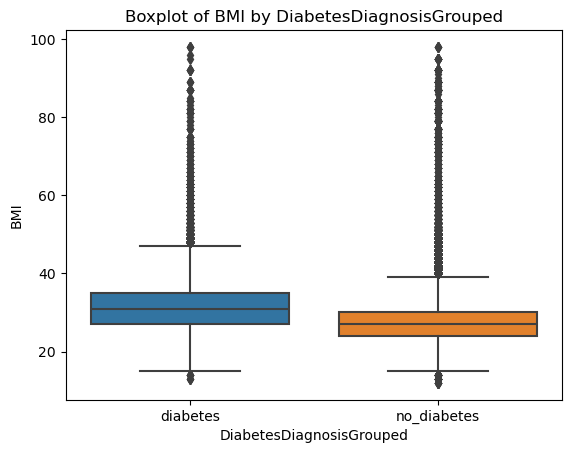

In [36]:
# Continuous variable of BMI (Body Mass Index) number

sns.boxplot(x='DiabetesDiagnosisGrouped', y='BMI', data=df)
plt.xlabel('DiabetesDiagnosisGrouped')
plt.ylabel('BMI')
plt.title('Boxplot of BMI by DiabetesDiagnosisGrouped')
plt.show()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

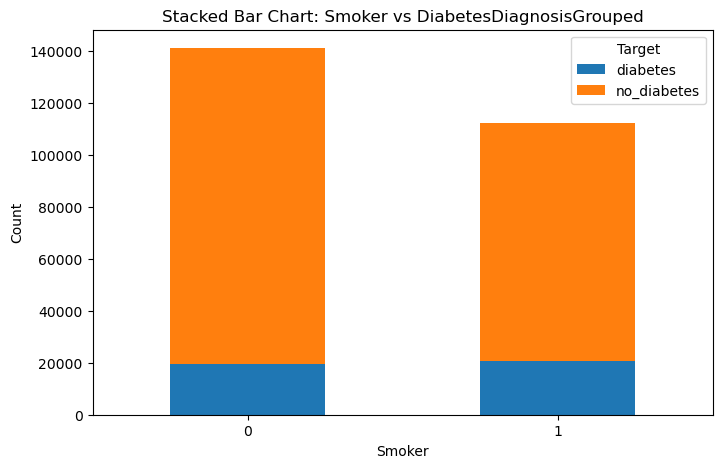

In [38]:
# Have you smoked at least 100 cigarettes in your entire life? (5 packs is equal to 100 cigarettes)
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Smoker'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Smoker vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

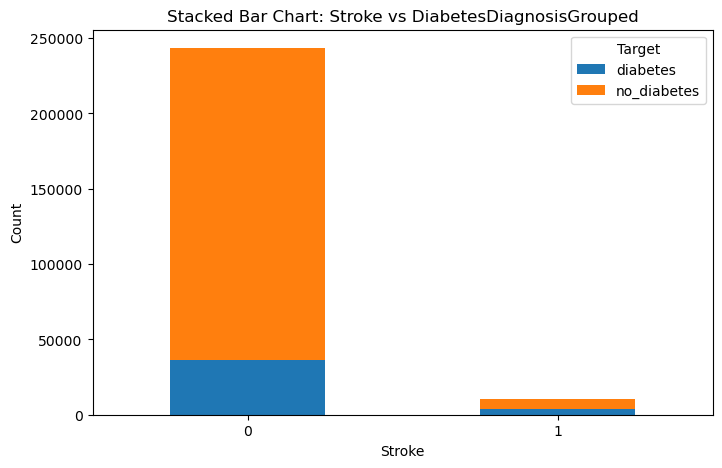

In [40]:
# Have you ever been told you have had a stroke?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Stroke'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Stroke vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

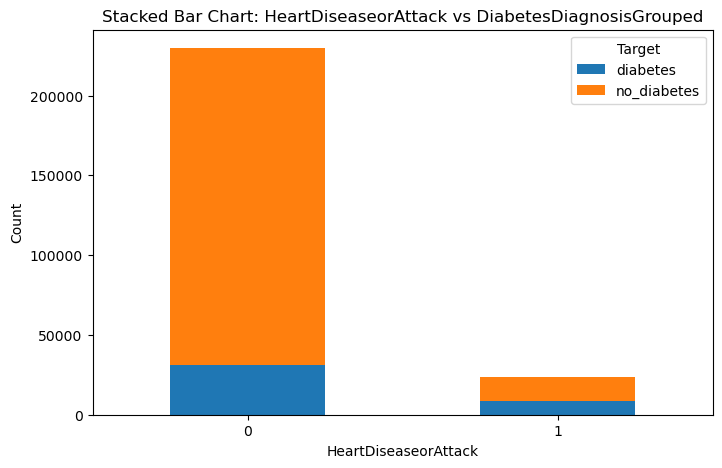

In [42]:
# Have you ever had/have Coronary Heart Disease (CHD) OR have you ever had a Myocardial Infarction (MI)
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['HeartDiseaseorAttack'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('HeartDiseaseorAttack')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: HeartDiseaseorAttack vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

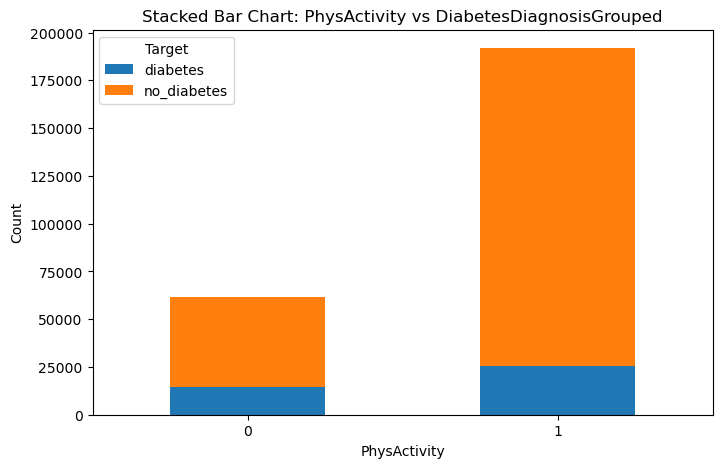

In [44]:
# Have you had any physical activity or exercise during the past 30 days? Not including your job
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['PhysActivity'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('PhysActivity')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: PhysActivity vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

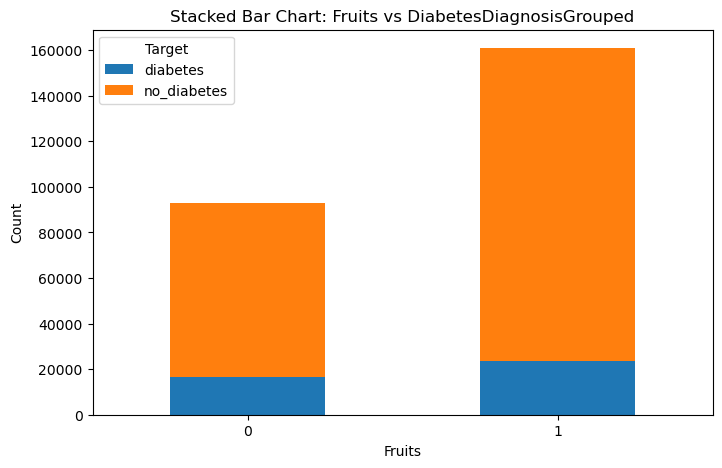

In [46]:
# Do you consume fruit 1 or more times per day?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Fruits'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Fruits')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Fruits vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

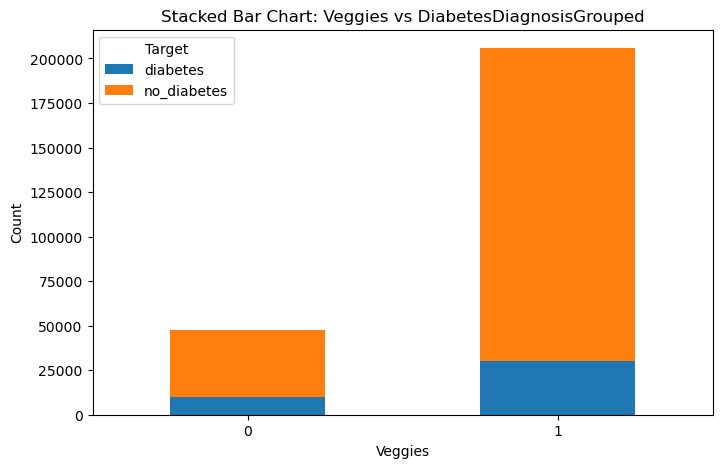

In [48]:
# Do you consume vegetables 1 or more times per day?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Veggies'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Veggies')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Veggies vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

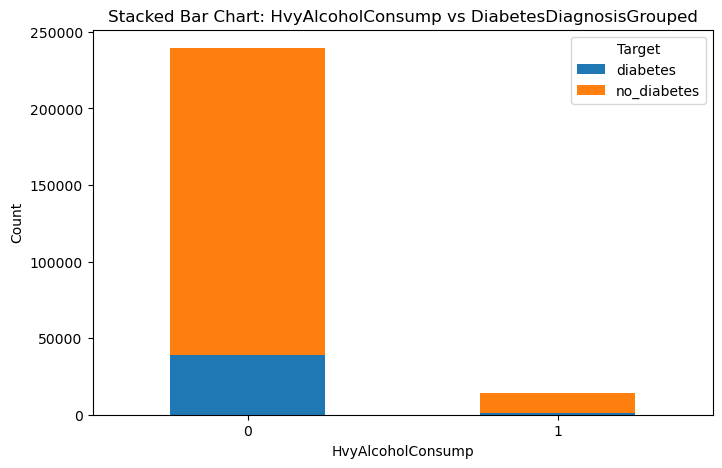

In [50]:
# Are you a heavy drinker? Adult men having more than 14 drinks per week. Adult women having more than 7 drinks per week.
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['HvyAlcoholConsump'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('HvyAlcoholConsump')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: HvyAlcoholConsump vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

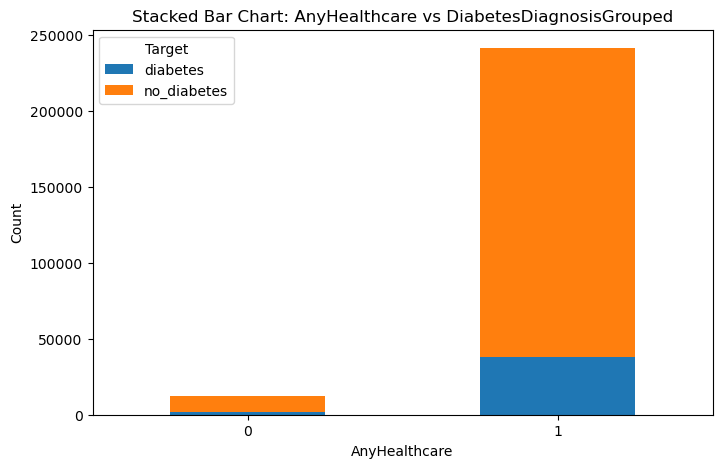

In [52]:
# Do you have any kind of healthcare coverage? Including health insurance, prepaid plans such as HMO, etc?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['AnyHealthcare'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('AnyHealthcare')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: AnyHealthcare vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

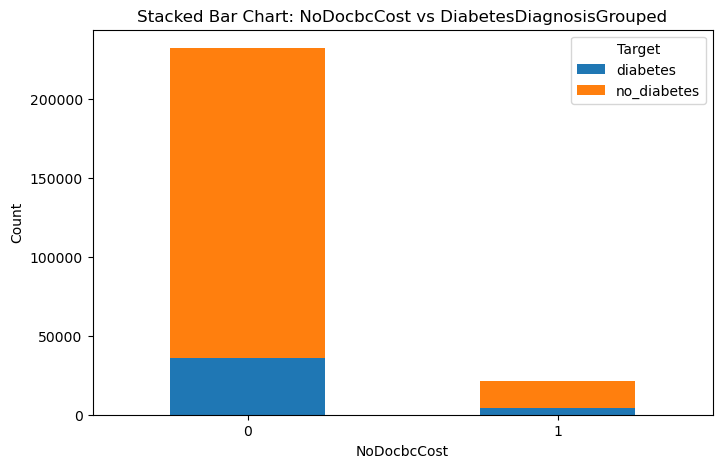

In [54]:
# Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['NoDocbcCost'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('NoDocbcCost')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: NoDocbcCost vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

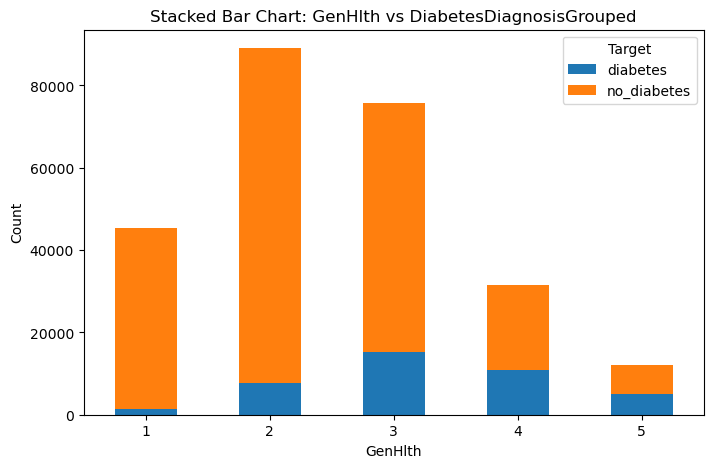

In [56]:
# Would you say that in general your health is 1-5 scale. 
# 1 = excellent
# 2 = very good
# 3 = good
# 4 = fair
# 5 = poor

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['GenHlth'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('GenHlth')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: GenHlth vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

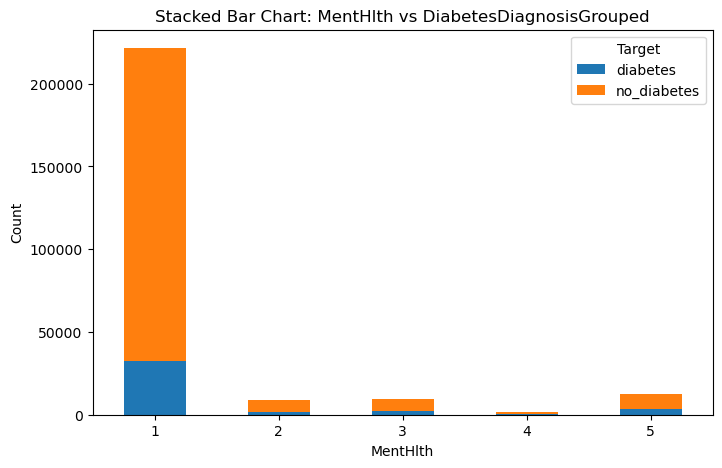

In [58]:
# Thinking about your mental health which includes stress, depression, and problems with emotions...
# How many days during the past 30 days was your mental health not good?
# 1 = 1 week
# 2 = 2 weeks
# 3 = 3 weeks
# 4 = 4 weeks
# 5 = 5 weeks

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['MentHlth'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('MentHlth')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: MentHlth vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

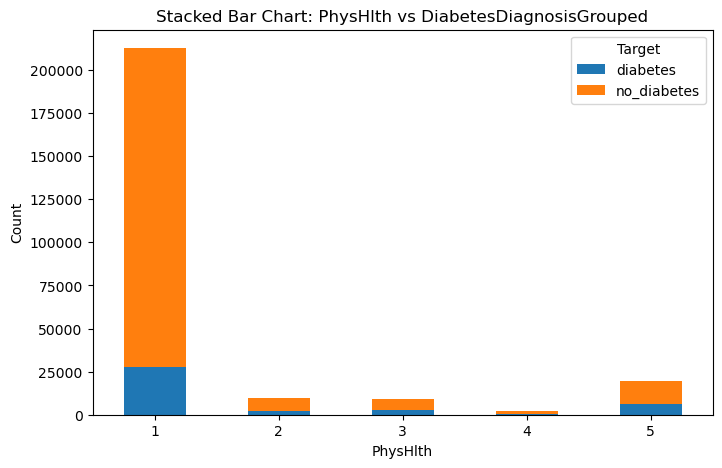

In [60]:
# Thinking of your physical health which includes physical illness and injury...
# How many days during the past 30 days was your physical health not good?
# 1 = 1 week
# 2 = 2 weeks
# 3 = 3 weeks
# 4 = 4 weeks
# 5 = 5 weeks

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['PhysHlth'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('PhysHlth')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: PhysHlth vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

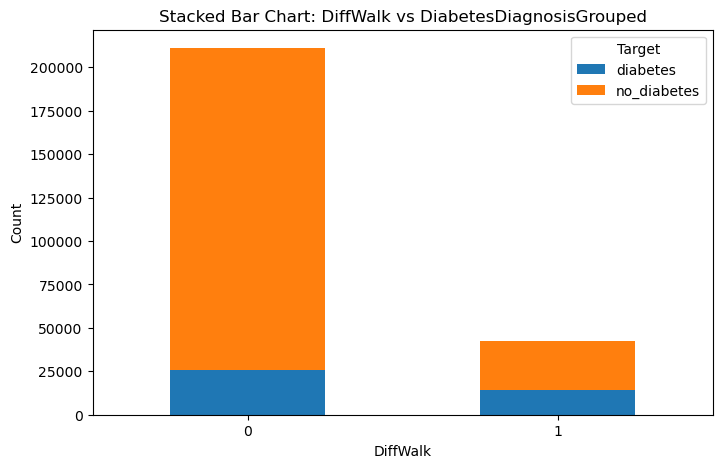

In [62]:
# Do you have serious difficulty walking or climbing stairs?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['DiffWalk'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('DiffWalk')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: DiffWalk vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

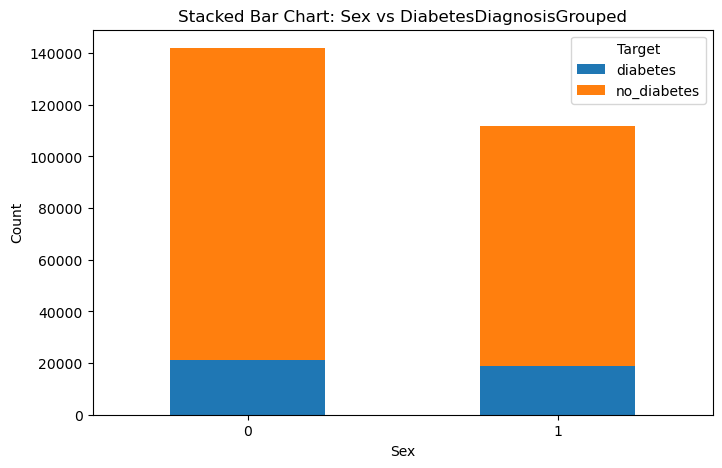

In [64]:
# What is your gender?
# 0 = female
# 1 = male

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Sex'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Sex vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13')])

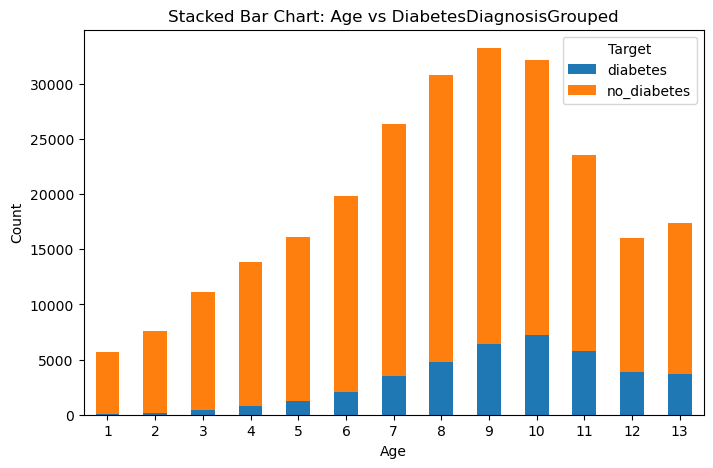

In [66]:
# What is your age?
# 1 = 18-24
# 2 = 25-29
# 3 = 30-34
# 4 = 35-39
# 5 = 40-44
# 6 = 45-49
# 7 = 50-54
# 8 = 55-59
# 9 = 60-64
# 10 = 65-69
# 11 = 70-74
# 12 = 75-79
# 13 = 80 or older

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Age'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Age vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

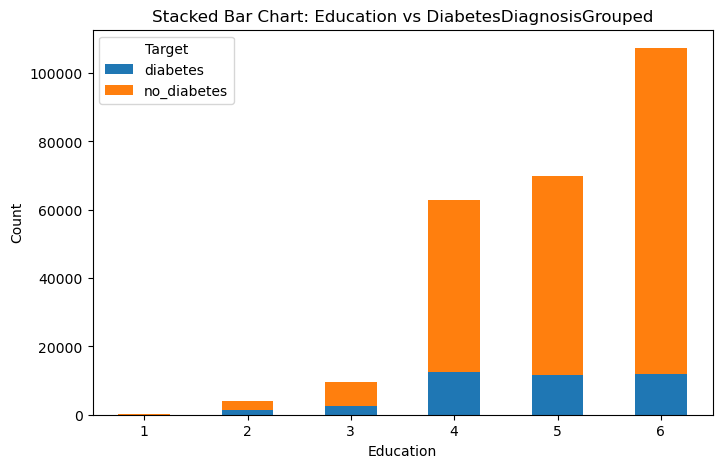

In [68]:
# What is your education level?
# 1 = never attended school or only kindergarten
# 2 = grades 1-8 (elementary)
# 3 = grades 9-12 (some high school)
# 4 = grades 12 or GED (high school graduate)
# 5 = college 1 year to 3 years (some college or technical school)
# 6 = college 4 years or more (college graduate)

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Education'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Education vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8')])

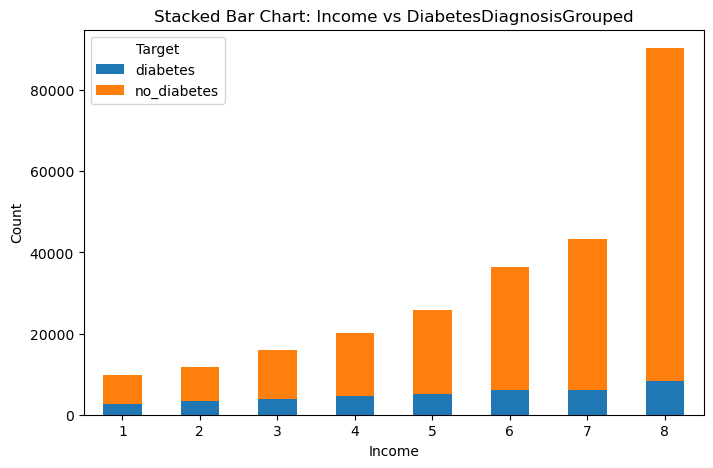

In [70]:
# What is your income level?
# 1 = less than $10,000
# 2 = less than $15,000
# 3 = less than $20,000
# 4 = less than $25,000
# 5 = less than $35,000
# 6 = less than $50,000
# 7 = less than $75,000
# 8 = $75,000 or more

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Income'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Income vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

### Building Correlation Heatmap of All Features and Target Feature

In [73]:
# Will use Cramer's V score to create a correlation heatmap
# Cramer's V measures the strength of association between two categorical variables.
# It ranges from 0 (no association) to 1 (perfect association)
# It is based on the Chi-square statisic

from scipy.stats import chi2_contingency

In [75]:
def cramers_v(x, y):

    # Creating a contingency table
    confusion_matrix = pd.crosstab(x, y)

    # Calculating Chi-square
    chi2, _, _, _ = chi2_contingency(confusion_matrix)

    # Computing Cramer's V
    n = confusion_matrix.sum().sum() # total observations
    r, k = confusion_matrix.shape # number of rows, columns in contingency table
    return np.sqrt((chi2 / n) / (min(r-1, k-1)))

In [77]:
# List of categorical columns (including my target feature)

categorical_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 
    'Sex', 'Age', 'Education', 'Income', 'DiabetesDiagnosisGrouped']

# Initialize an empty square DataFrame
cramer_matrix = pd.DataFrame(
    np.zeros((len(categorical_cols), len(categorical_cols))),
    index = categorical_cols, columns = categorical_cols)

# Fill in the matrix with Cramer's V values
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramer_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

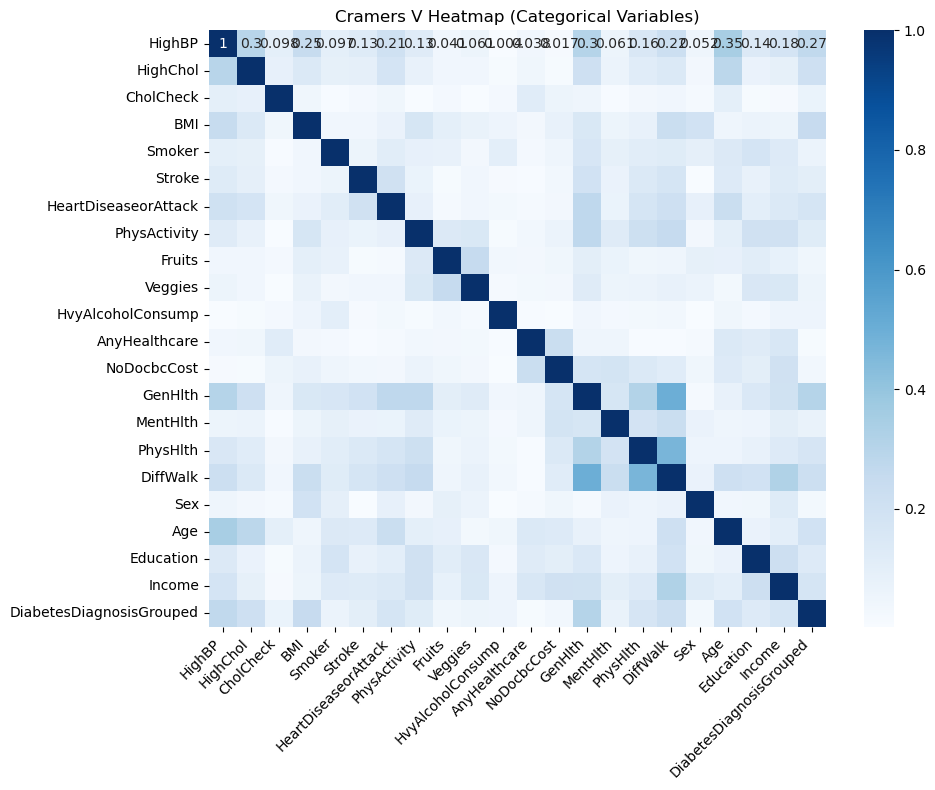

In [79]:
# Making a heatmap of the Cramer's V Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='Blues', 
            xticklabels=categorical_cols, yticklabels=categorical_cols)
plt.title('Cramers V Heatmap (Categorical Variables)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Using Random Forest to Get Feature Importance for the Features

In [82]:
# Loading the packages needed

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [84]:
# Identifying my target and features

target = df['DiabetesDiagnosisGrouped']

columns_to_drop = ['DiabetesDiagnosis', 'DiabetesDiagnosisGrouped']
features = df.drop(columns=columns_to_drop)

In [86]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# X_train = training data (independent variables)
# X_test = testing data (independent variables)
# y_train = training labels (dependent variable)
# y_test = testing labels (dependent variable)

In [88]:
# Instantiating and fitting the RandomForestClassifier Model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
# Getting feature importances

importances = rf_model.feature_importances_

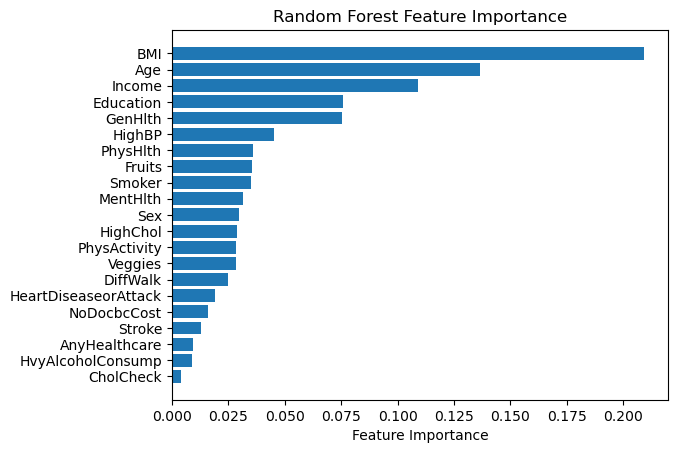

In [92]:
# Plotting the feature importances in a horizontal barchart

feature_cols = X_train.columns

# Sorting the feature importances in ascending order
indices = np.argsort(importances)


plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_cols[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

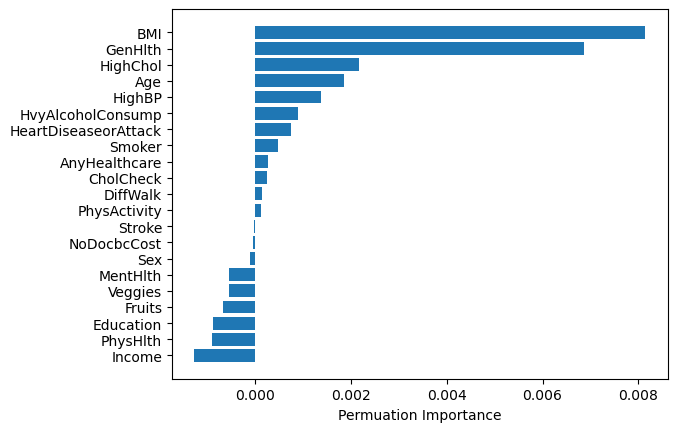

In [96]:
# Permutation based feature importance with scikit-learn to overcome drawbacks of default feature importance computed with mean impurity decrease

perm_importance = permutation_importance(rf_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)

# Sorting feature importances

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permuation Importance') 
plt.show()

### Findings

#### Through feature selection and engineering, I'm able to see that BMI, GenHlth, and HighChol are the variables that predict the Diabetes Prediction outcome.